# EXERCÍCIO 2

In [ ]:
!pip install slycot
!pip install control

In [ ]:
!pip install tbcontrol

In [1]:
from sympy import Symbol, simplify, limit, cancel, fraction, poly, solve, laplace_transform, inverse_laplace_transform, apart, integrate, exp, oo
from math import pi
from scipy.signal import lsim
import matplotlib.pyplot as plt
import control.matlab as c
from tbcontrol.symbolic import routh
import numpy as np

In [2]:
s = Symbol('s')
K = Symbol('K')
t = Symbol('t')

## Sistema em malha aberta

In [3]:
G = (K*(s+1))/(s*(s-1)*(s**2 + 4*s + 16))
G

K*(s + 1)/(s*(s - 1)*(s**2 + 4*s + 16))

In [4]:
G = cancel(G)
G

(K*s + K)/(s**4 + 3*s**3 + 12*s**2 - 16*s)

### a) Encontre a faixa de valores de K para os quais o sistema (em malha fechada) é estável

#### Sistema em malha fechada

In [5]:
Num = G
Den = 1+G
G_mf = Num/Den
G_mf

(K*s + K)/(((K*s + K)/(s**4 + 3*s**3 + 12*s**2 - 16*s) + 1)*(s**4 + 3*s**3 + 12*s**2 - 16*s))

In [6]:
G_mf = cancel((Num)/(Den))
G_mf

(K*s + K)/(K*s + K + s**4 + 3*s**3 + 12*s**2 - 16*s)

#### Denominador da FT malha fechada

In [7]:
Num, Den = fraction(G_mf)

In [8]:
Num

K*s + K

In [9]:
# Polinômio característico
Den

K*s + K + s**4 + 3*s**3 + 12*s**2 - 16*s

#### Critério de Routh-Hurwitz

In [10]:
# Verificando estabilidade
tab_routh = routh(poly(Den,s))
tab_routh

Matrix([
[                           1,     12, K],
[                           3, K - 16, 0],
[                  52/3 - K/3,      K, 0],
[(K**2 - 59*K + 832)/(K - 52),      0, 0],
[                           K,      0, 0]])

In [11]:
K_estab = solve([e > 0 for e in tab_routh[:, 0]], K)
print(f'Sistema estável se: \n {K_estab}')

Sistema estável se: 
 (0 < K) & (K < 52) & (((52 < K) & (K < oo)) | ((K < 3*sqrt(17)/2 + 59/2) & (59/2 - 3*sqrt(17)/2 < K)))


In [59]:
(3*np.sqrt(17))/2 + 59/2

35.68465843842649

In [60]:
-(3*np.sqrt(17))/2 + 59/2

23.31534156157351

### b) Calcule as constantes 𝐾𝑝, 𝐾𝑣 e 𝐾a

#### Sistema do tipo 1 (um polo na origem)

Constante de erro  | Valor
:---------: | :------:
Kp | oo
Kv | Cte
Ka | 0


#### Constante de erro de posição

In [12]:
K_p = limit(G, s, 0)
K_p

-oo*sign(K)

#### Constante de erro de velocidade

In [13]:
K_v = limit(s*G, s, 0)
K_v

-K/16

#### Constante de erro de aceleração

In [14]:
K_a = limit(s**2*G, s, 0)
K_a

0

### c) Determine o erro de regime para uma entrada 𝑟(𝑡) = 2 + 3𝑡

#### Encontrando R(s)

In [15]:
f = 2 + 3*t
R_s = laplace_transform(f, t, s, noconds=True) 
R_s

(2*s + 3)/s**2

#### Erro de regime permanente

In [16]:
ess = limit(s*((1-G_mf)*R_s), s, 0)
ess

-48/K

### d) Para 𝐾 = 32, plote a resposta do sistema (em malha fechada) para 𝑟(𝑡) = 2 + 3𝑡; compare o resultado do erro de regime permanente obtido da simulação e pela fórmula

#### Sistema em malha aberta

In [17]:
G = (32*(s+1))/(s*(s-1)*(s**2 + 4*s + 16))
G

(32*s + 32)/(s*(s - 1)*(s**2 + 4*s + 16))

#### Sistema em malha fechada

In [18]:
# Simplificando
G_mf = cancel((G)/(1+G))
G_mf

(32*s + 32)/(s**4 + 3*s**3 + 12*s**2 + 16*s + 32)

#### Fórmula - Erro de regime permanente

In [19]:
# Verificando estabilidade
Num, Den = fraction(G_mf)
tab_routh = routh(poly(Den,s))
tab_routh

Matrix([
[   1, 12, 32],
[   3, 16,  0],
[20/3, 32,  0],
[ 8/5,  0,  0],
[  32,  0,  0]])

In [20]:
# Erro de regime permanente
ess = limit(s*(1-G_mf)*R_s, s, 0)
ess

-3/2

#### Gráfico - Resposta do sistema (em malha fechada) para 𝑟(𝑡) = 2 + 3𝑡

In [21]:
K = 32
Num = [K, K]
Den = [1, 3, 12, 16, 32]
G_mf = c.tf(Num,Den)

In [23]:
r = 2 + 3*t
t = np.arange(0,100,0.1)
t, y_sinal, x_sinal = lsim((Num, Den), r, t)

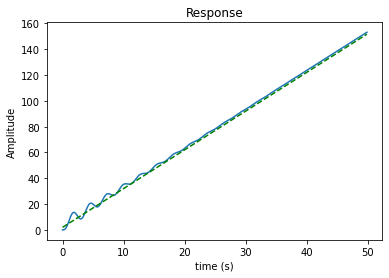

In [54]:
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Response')

n = 500
plt.plot(t[0:n], y_sinal[0:n])
plt.plot(t[0:n], r[0:n],'g--')

plt.show()

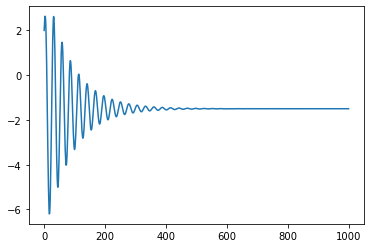

In [57]:
erro_sinal = np.transpose(r) - y_sinal
plt.plot(erro_sinal)

In [58]:
erro_sinal[-1]

-1.5000130553533495